# **Pakages Imports**

In [1]:
import os
import numpy as np 
from PIL import Image, UnidentifiedImageError
from skimage import transform, color
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Data Import**

In [2]:
Parasitized= os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/')
Uninfected = os.listdir('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/')

# **Data Preprocessing**

### **Image Resize**

In [3]:
img_w, img_h = 75,75
x_rgb = []
x_bnw = []
y = []

In [4]:
for i in Parasitized:
    try:
        img = Image.open('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + i).convert('RGB')
        img = img.resize((img_w,img_h))
        
        x_rgb.append(np.asarray(img))
        x_bnw.append(np.asarray(img_bnw))
        
        y.append(1)
        
    except UnidentifiedImageError:
        pass

In [5]:
for i in Uninfected :
    try:
        img = Image.open('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/' + i).convert('RGB')
        img = img.resize((img_w,img_h))
        img_bnw = color.rgb2gray(img)
        
        x_rgb.append(np.asarray(img))
        x_bnw.append(np.asarray(img_bnw))
        
        y.append(0)
    except UnidentifiedImageError:
        pass

In [6]:
x_rgb = np.asarray(x_rgb)
x_bnw = np.expand_dims(x_bnw,-1)
x_bnw = np.asarray(x_bnw)
y = np.asarray(y)
print('''Shape is array of color iamges: {}
Shape of array of black and white images: {}
Shape of array of lebels: {}'''.format(x_rgb.shape, x_bnw.shape, y.shape))

Shape is array of color iamges: (27558, 120, 120, 3)
Shape of array of black and white images: (27558, 120, 120)
Shape of array of lebels: (27558,)


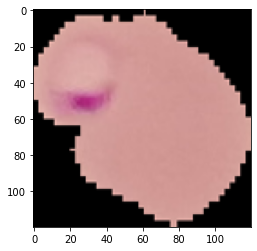

In [7]:
plt.imshow(x_rgb[7])

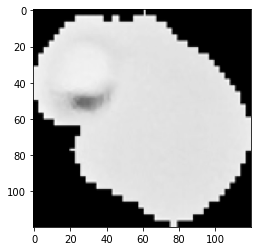

In [8]:
plt.imshow(x_bnw[7], cmap='Greys_r')

In [9]:
with open('rgb_data.npy', 'wb') as f:
    np.save(f, x_rgb)
    np.save(f, y)
    
with open('bnw_data.npy', 'wb') as f:
    np.save(f, x_bnw)
    np.save(f, y)